<a href="https://colab.research.google.com/github/Aldistwn29/Feature_Enginnering/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libary
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
dataset = sns.load_dataset("diamonds")

In [8]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

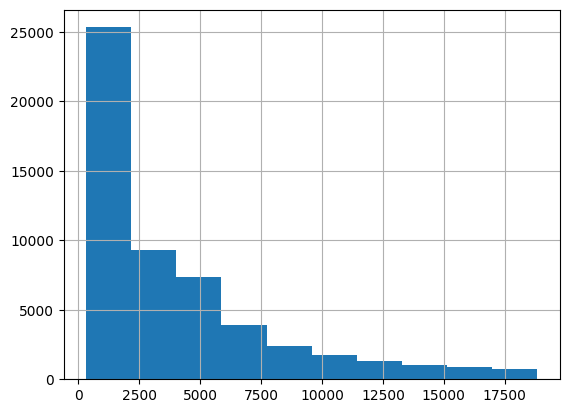

In [9]:
dataset["price"].hist()

In [10]:
long_price = dataset["price"].apply(np.log)

In [11]:
long_price

0        5.786897
1        5.786897
2        5.789960
3        5.811141
4        5.814131
           ...   
53935    7.921898
53936    7.921898
53937    7.921898
53938    7.921898
53939    7.921898
Name: price, Length: 53940, dtype: float64

<Axes: >

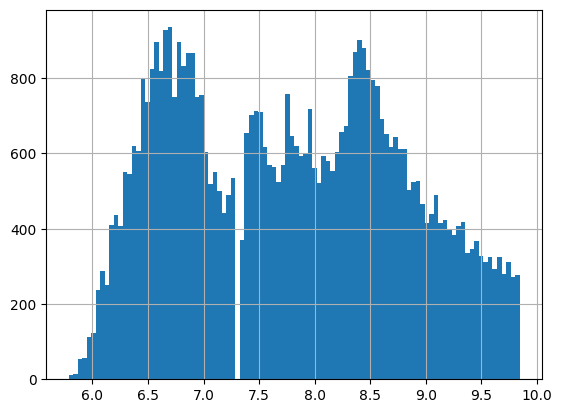

In [12]:
long_price.hist(bins = 100)

In [13]:
dataset["price"].apply(lambda x: np.log(x) + 1)

0        6.786897
1        6.786897
2        6.789960
3        6.811141
4        6.814131
           ...   
53935    8.921898
53936    8.921898
53937    8.921898
53938    8.921898
53939    8.921898
Name: price, Length: 53940, dtype: float64

In [14]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
# Function membuat outlier

def outliers(x):
  q1, q3 = x.quantile([0.25, 0.75])
  iqr = q3 - q1

  if(x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
   return False

In [16]:
q1, q3 = dataset["price"].quantile([0.25, 0.75])
iqr = q3 - q1

def outliers(x):
  if(x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
   return False

dataset["prince_outlier"] = dataset["price"].apply(outliers)
dataset["prince_outlier"]

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: prince_outlier, Length: 53940, dtype: bool

In [17]:
dataset[dataset["prince_outlier"]]

,carat,cut,color,clarity,depth,table,price,x,y,z,prince_outlier
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21,True
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06,True
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74,True
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08,True
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68,True
...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,True
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,True
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,True
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,True


# Standardization

In [19]:
# membuat function
def max_min_scale(x):
  result = (x - x.min()) / (x.max() - x.min())
  return result

In [23]:
# menggunakan oprasi pada columns
dataset[["price", "carat"]].apply(max_min_scale, axis = 0)

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


In [24]:
# menggunakan Libary dari python
from sklearn.preprocessing import MinMaxScaler

In [27]:
min_max = MinMaxScaler()
min_max.fit_transform(dataset[["price", "carat"]])

array([[0.00000000e+00, 6.23700624e-03],
       [0.00000000e+00, 2.07900208e-03],
       [5.40628210e-05, 6.23700624e-03],
       ...,
       [1.31426718e-01, 1.03950104e-01],
       [1.31426718e-01, 1.37214137e-01],
       [1.31426718e-01, 1.14345114e-01]])

In [33]:
# Array output di atas di simpan pada varibel hasil
hasil =min_max.fit_transform(dataset[["price", "carat"]])
# di jadikan dataFrame
pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


In [39]:
# membuat function normal_scale
def normal_scale(x):
  result = (x - x.mean()) / x.std()
  return result

In [40]:
dataset[["price", "carat"]].apply(normal_scale, axis = 0)

,price,carat
0,-0.904087,-1.198157
1,-0.904087,-1.240350
2,-0.903836,-1.198157
3,-0.902081,-1.071577
4,-0.901831,-1.029384
...,...,...
53935,-0.294728,-0.164426
53936,-0.294728,-0.164426
53937,-0.294728,-0.206619
53938,-0.294728,0.130926


In [43]:
# menggunakan Libary di pyhton
from sklearn.preprocessing import StandardScaler

normal_scaler = StandardScaler()
normal_scaler.fit_transform(dataset[["price", "carat"]])

array([[-0.90409516, -1.19816781],
       [-0.90409516, -1.24036129],
       [-0.9038445 , -1.19816781],
       ...,
       [-0.29473076, -0.20662095],
       [-0.29473076,  0.13092691],
       [-0.29473076, -0.10113725]])

In [44]:
# Array output di atas di simpan pada varibel hasil
hasil = normal_scaler.fit_transform(dataset[["price", "carat"]])

In [45]:
# menjadikan array di atas menjadi dataFrame
pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,-0.904095,-1.198168
1,-0.904095,-1.240361
2,-0.903844,-1.198168
3,-0.902090,-1.071587
4,-0.901839,-1.029394
...,...,...
53935,-0.294731,-0.164427
53936,-0.294731,-0.164427
53937,-0.294731,-0.206621
53938,-0.294731,0.130927


# Encoding

In [47]:
dataset["cut"] = dataset["cut"].astype("category")
dataset["cut_encode"] = dataset["cut"].cat.codes
dataset[["cut", "cut_encode"]]

,cut,cut_encode
0,Ideal,0
1,Premium,1
2,Good,3
3,Premium,1
4,Good,3
...,...,...
53935,Ideal,0
53936,Good,3
53937,Very Good,2
53938,Premium,1


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cut_category = le.fit_transform(dataset["cut"])

In [57]:
cut_category

array([2, 3, 1, ..., 4, 3, 2])

In [58]:
le.inverse_transform(cut_category)

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [71]:
# menggunakan dummies
pd.get_dummies(dataset["cut"])

,Ideal,Premium,Very Good,Good,Fair
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
53935,1,0,0,0,0
53936,0,0,0,1,0
53937,0,0,1,0,0
53938,0,1,0,0,0


In [72]:
# menggunakan prameter
pd.get_dummies(dataset["cut"], drop_first = True)

,Premium,Very Good,Good,Fair
0,0,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
53935,0,0,0,0
53936,0,0,1,0
53937,0,1,0,0
53938,1,0,0,0


In [75]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cut_category = ohe.fit_transform(dataset[["cut"]])

In [77]:
# menjadikan Matrix
cut_category.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [79]:
# menajdikan arry matrix di atas jadi dataFrame
pd.DataFrame(cut_category.toarray())

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0
